Consider the dataset “advertising.csv”. Sales are proposed to be enhanced with advertisement in 
TV, Radio and Newspaper.

PART-A

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/advertising (1).csv')

In [ ]:
df

,Unnamed: 0,Unnamed: 0.1,TV,Radio,Newspaper,Sales
0,0,1,230.1,37.8,69.2,22.1
1,1,2,44.5,39.3,45.1,10.4
2,2,3,17.2,45.9,69.3,9.3
3,3,4,151.5,41.3,58.5,18.5
4,4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...,...
195,195,196,38.2,3.7,13.8,7.6
196,196,197,94.2,4.9,8.1,9.7
197,197,198,177.0,9.3,6.4,12.8
198,198,199,283.6,42.0,66.2,25.5


1. Draw (a) a scatter plot of money spent on TV advertisements versus sales (b) Pair plots and 
Heatmap.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


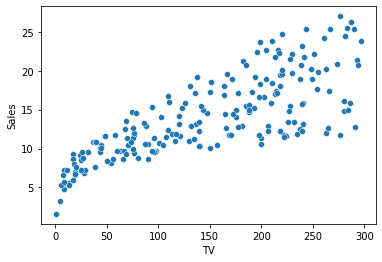

In [ ]:
sns.scatterplot(df.TV,df.Sales)

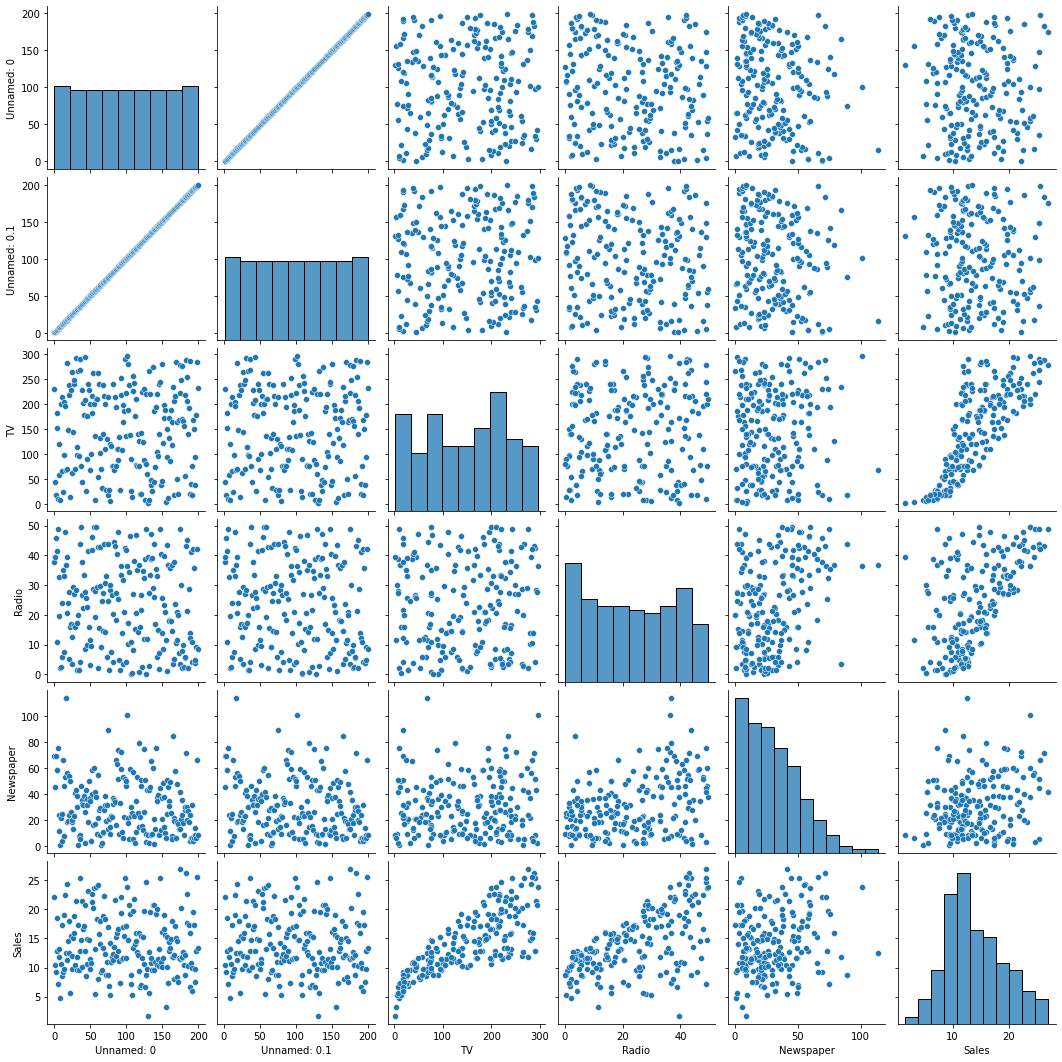

In [ ]:

sns.pairplot(df)
plt.show()

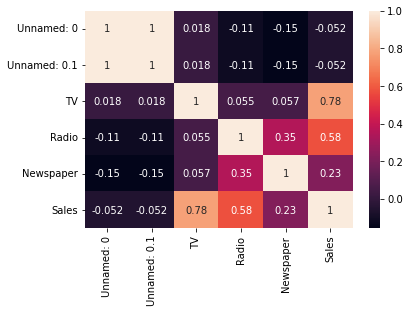

In [ ]:
# Heatmap
sns.heatmap(df.corr(), annot=True)
plt.show()

2. Develop a Linear Regression model based on money spent on TV advertisements versus Sales.

In [ ]:
import statsmodels.api as sm

In [ ]:
X = df["TV"]
y = df["Sales"]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


3. With the regression line so developed, predict the sales that can be anticipated based on the 
money spent on TV advertisements.

In [ ]:
predictions = model.predict(X)

4. Draw the Regression Line superimposing on the data.

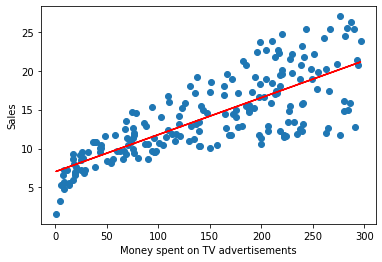

In [ ]:
plt.scatter(df["TV"], df["Sales"])
plt.plot(df["TV"], predictions, color="red")
plt.xlabel("Money spent on TV advertisements")
plt.ylabel("Sales")
plt.show()

5. Employ statsmodels.api and run an OLS regressor on the data. Plot the line of regression and 
residuals employing libraries of statsmodel. Comment on the heteroscedasticity.

In [ ]:
model = sm.OLS(y, X)
results = model.fit()

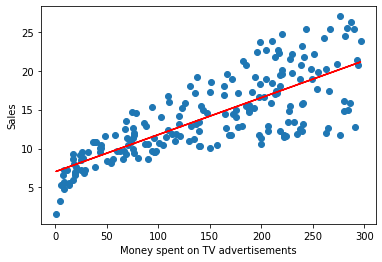

In [ ]:
plt.scatter(df["TV"], df["Sales"])
plt.plot(df["TV"], results.predict(X), color="red")
plt.xlabel("Money spent on TV advertisements")
plt.ylabel("Sales")
plt.show()

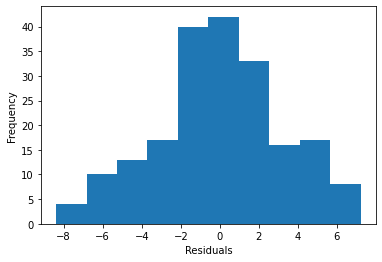

In [ ]:
residuals = y - results.predict(X)
plt.hist(residuals)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [ ]:
if abs(residuals).mean() > 0.5:
    print("There may be heteroscedasticity in the data. It is worth investigating further.")
else:
    print("There does not appear to be heteroscedasticity in the data.")

There may be heteroscedasticity in the data. It is worth investigating further.


## PART2

Consider the dataset "pima-indians-diabetes.csv". Label indicates the presence of diabetes(1) or 
its absence(0).Objective is to prepare a KNN classifier for the dataset.


In [ ]:
df1=pd.read_csv('/content/pima-indians-diabetes.csv')

In [ ]:
df1

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
x = df1.iloc[:, :-1].values
x.shape
y = df1.iloc[:, -1].values
y.shape

(767,)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
print(x)

[[-0.84372629 -1.12208597 -0.16024856 ... -0.68372895 -0.36426474
  -0.18894038]
 [ 1.23423997  1.94447577 -0.26357823 ... -1.10230105  0.60470064
  -0.1037951 ]
 [-0.84372629 -0.99692019 -0.16024856 ... -0.49346891 -0.91968415
  -1.0403932 ]
 ...
 [ 0.343683    0.0044061   0.14974046 ... -0.73446496 -0.68423462
  -0.27408566]
 [-0.84372629  0.16086333 -0.47023757 ... -0.23978884 -0.37030191
   1.17338414]
 [-0.84372629 -0.8717544   0.04641078 ... -0.20173684 -0.47293375
  -0.87010264]]


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

2. Employ the standard scalar library and rescale the distribution of values so that the mean of 
observed values is 0 and the standard deviation is 1.

In [ ]:

np.mean(df1)

6          3.842243
148      120.859192
72        69.101695
35        20.517601
0         79.903520
33.6      31.990482
0.627      0.471674
50        33.219035
1          0.348110
dtype: float64

3. Develop a KNN classifier model and predict for the test data.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn5 = KNeighborsClassifier(n_neighbors = 2)
knn5.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
y_pred = knn5.predict(x_test)
y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

4. Draw up a confusion matrix.

0.7207792207792207

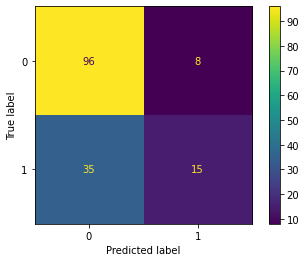

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
accuracy_score(y_test, y_pred)

0.7207792207792207

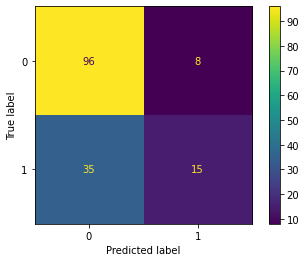

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
accuracy_score(y_test, y_pred)

5. Identify an optimum k value based on minimum mean errors (consider a range of 20). Draw a 
corresponding graph between Mean error and k-value.

Text(0, 0.5, 'score')

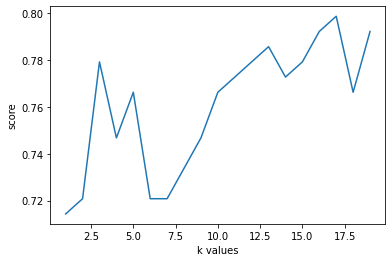

In [ ]:

score_list=[]
for each in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))

plt.plot(range(1,20),score_list)
plt.xlabel("k values")
plt.ylabel("score")

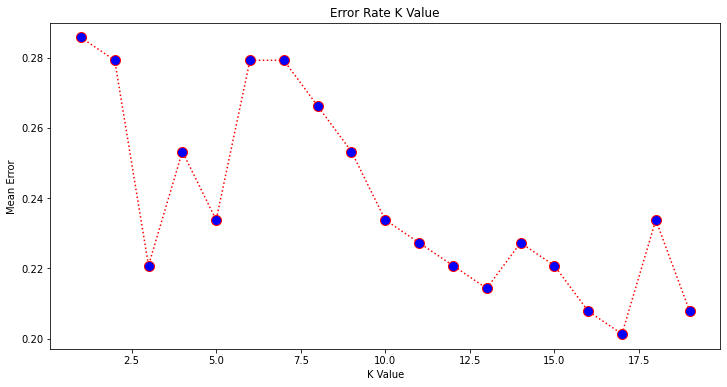

In [ ]:
errors = []

for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    errors.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), errors, color='red', linestyle='dotted', marker='o',
            markerfacecolor='blue', markersize=10)  
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()